# Trực quan hóa dữ liệu với Matplotlib

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import datetime as dt
import math

## Mục tiêu của trực quan hóa dữ liệu

**Mục tiêu 1: Để giúp bạn hiểu rõ hơn về dữ liệu/kết quả của mình.**
- Phần quan trọng trong khám phá dữ liệu (exploratory data)
- Tóm tắc các xu hướng một cách trực quan trước khi phân tích sâu hơn

**Mục tiêu 2: Truyền đạt kết quả/kết luận cho người khác.**
- Tính chỉnh sửa và chọn lọc cao
- Cần tinh chỉnh để đạt được mục tiêu truyền đạt.

**Lưu ý**:
- Visualizations aren't a matter of making "pretty" pictures.
- We need to do a lot of thinking about what stylistic choices communicate ideas most effective

Trực quan hóa gồm hai giai đoạn:
- Chọn đúng plot
- Tình chỉnh plot phù hợp

## Histogram

Dùng để trực quan hóa phân bố các giá trị của biến dạng "numerical"
- **Numerical**
- Categorical

Histogram gồm:
- Phân chia các điểm dữ liệu có giá trị tương tự vào một "bin" chung.
- Scale các bin sao cho diện tích của mỗi bin bằng tỷ lệ phần trăm của các điểm dữ liệu trong đó


### Đọc dữ liệu điểm quiz từ file và tiền xử lý

In [8]:
# Đọc dữ liệu về kết quả làm quiz của lớp
# (Code lấy từ file 05-Demo.ipynb)
file = open('Data/PythonQuiz2023.csv', 'r',encoding='utf-8-sig')

cols = {}
first_line_vals = file.readline().rstrip().split(',')
for first_line_val in first_line_vals:
    cols[first_line_val] = []
for line in file:
    line_vals = line.rstrip().split(',')
    if (line_vals[0] == 'Never submitted'):
        continue
    for i in range(len(line_vals)):
        cols[first_line_vals[i]].append(line_vals[i])

file.close()

for col_name, col_vals in cols.items():
    print(f'{col_name}: [{col_vals[0]}, ...]')

State: [Finished, ...]
Started on: [17/10/2023 18:00, ...]
Completed: [17/10/2023 18:24, ...]
Time taken: [24 mins 1 sec, ...]
Grade/10.00: [9.53, ...]
Q. 1 /0.63: [0.63, ...]
Q. 2 /0.63: [0.63, ...]
Q. 3 /0.63: [0.63, ...]
Q. 4 /0.63: [0.63, ...]
Q. 5 /0.63: [0.63, ...]
Q. 6 /0.63: [0.63, ...]
Q. 7 /0.63: [0.63, ...]
Q. 8 /0.63: [0.63, ...]
Q. 9 /0.63: [0.63, ...]
Q. 10 /0.63: [0.47, ...]
Q. 11 /0.63: [0.31, ...]
Q. 12 /0.63: [0.63, ...]
Q. 13 /0.63: [0.63, ...]
Q. 14 /0.63: [0.63, ...]
Q. 15 /0.63: [0.63, ...]
Q. 16 /0.63: [0.63, ...]


In [9]:
# Chuyển kiểu dữ liệu của các cột từ str sang kiểu dữ liệu phù hợp
# (Code lấy từ file 04-Demo.ipynb)
new_cols = {}
for col_name, col_vals in cols.items():
    if '/' in col_name:
        new_col_vals = []
        for col_val in col_vals:
            try:
                col_val = float(col_val)
            except:
                col_val = 0
            new_col_vals.append(float(col_val))
        new_cols[col_name] = new_col_vals
    elif col_name in ['Started on', 'Completed']:
        new_col_vals = []
        for col_val in col_vals:
            new_col_val = dt.datetime.strptime(col_val,
                                               '%d/%m/%Y %H:%M')
            new_col_vals.append(new_col_val)
        new_cols[col_name] = new_col_vals
    elif col_name == 'Time taken':
        new_col_vals = []
        for col_val in col_vals:
            hour = 0; minute = 0; second = 0
            temp_list = col_val.split(' ')
            for temp_i in range(len(temp_list)):
                if 'hour' in temp_list[temp_i]:
                    hour = int(temp_list[temp_i - 1])
                elif 'min' in temp_list[temp_i]:
                    minute = int(temp_list[temp_i - 1])
                elif 'sec' in temp_list[temp_i]:
                    second = int(temp_list[temp_i - 1])
            new_col_val = hour * 60 + minute + second / 60
            new_col_vals.append(new_col_val)
        new_cols[col_name] = new_col_vals
    else:
        new_cols[col_name] = col_vals

In [10]:
cols = new_cols
for col_name, col_vals in cols.items():
    print(f'{col_name} {type(col_vals[0])}')

State <class 'str'>
Started on <class 'datetime.datetime'>
Completed <class 'datetime.datetime'>
Time taken <class 'float'>
Grade/10.00 <class 'float'>
Q. 1 /0.63 <class 'float'>
Q. 2 /0.63 <class 'float'>
Q. 3 /0.63 <class 'float'>
Q. 4 /0.63 <class 'float'>
Q. 5 /0.63 <class 'float'>
Q. 6 /0.63 <class 'float'>
Q. 7 /0.63 <class 'float'>
Q. 8 /0.63 <class 'float'>
Q. 9 /0.63 <class 'float'>
Q. 10 /0.63 <class 'float'>
Q. 11 /0.63 <class 'float'>
Q. 12 /0.63 <class 'float'>
Q. 13 /0.63 <class 'float'>
Q. 14 /0.63 <class 'float'>
Q. 15 /0.63 <class 'float'>
Q. 16 /0.63 <class 'float'>


### Vẽ histogram của cột điểm "Grade/10.00" với 4 bin có độ rộng bằng nhau

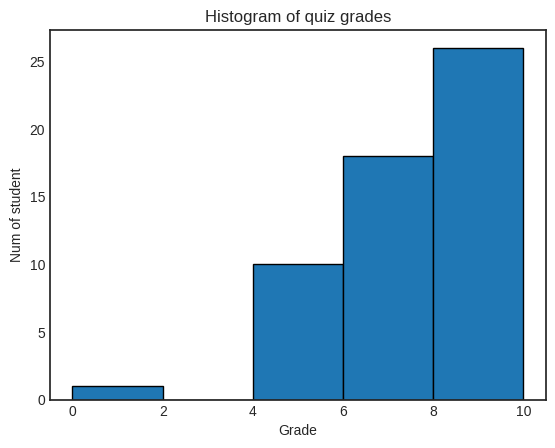

In [27]:
# cols['Grade/10.00']
hist = plt.hist(cols['Grade/10.00'], [0, 2, 4, 6, 8, 10], edgecolor='black')
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.show()

Kết quả đã tính ở file "04-Demo.ipynb": \
`{(0, 2): 0, (2, 4): 0, (4, 6): 10, (6, 8): 18, (8, 10): 26}`\
    *Bộ dữ liệu hơn khác với bài 04-Demo.ipynb để minh họa thêm ý trong bài này*\
    *Trong Dataset dùng trong bài 04-Demo.ipynb, (0, 2): 1*

In [30]:
# cols
# Ro

{'State': ['Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished',
  'Finished'],
 'Started on': [datetime.datetime(2023, 10, 17, 18, 0),
  datetime.datetime(2023, 10, 17, 18, 0),
  datetime.datetime(2023, 10, 17, 18, 0),
  datetime.datetime(2023, 10, 17, 18, 1),
  datetime.datetime(2023, 10, 17, 18, 

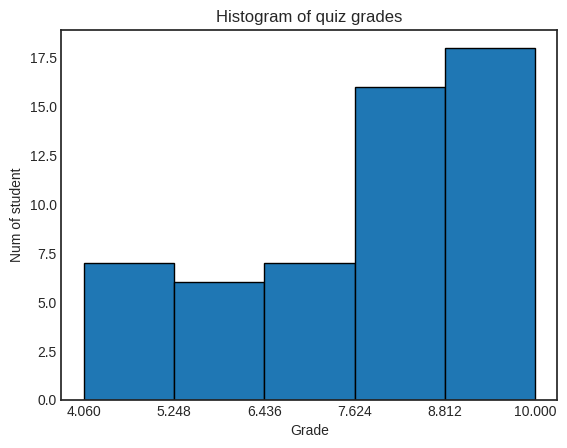

In [34]:
# Chia ra 4 bin có độ rộng bằng nhau
# bằng cách truyền một con số vào tham số bin của plt.hist
# cols['Grade/10.00']
hist = plt.hist(cols['Grade/10.00'], bins=5, edgecolor='black')
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.xticks(hist[1])
plt.show()

### Vẽ histogram của cột điểm "Grade/10.00" với 2 bin có độ rộng không bằng nhau là [0, 7.5) và [7.5, 10]

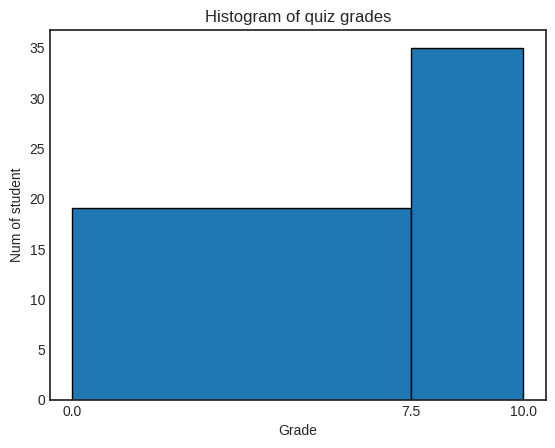

In [35]:
# Chia ra 4 bin có độ rộng bằng nhau
# bằng cách truyền một con số vào tham số bin của plt.hist
# cols['Grade/10.00']
hist = plt.hist(cols['Grade/10.00'], [0, 7.5, 10], edgecolor='black')
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.xticks(hist[1])
plt.show()

Khi nhìn hình, bạn cảm nhận số lượng sinh viên ở bin thứ 1 như thế nào với bin thứ 2? \
Có vẻ nhiều hơn!

Nhưng cảm nhận này không đúng: bin thứ 1 có 19 sinh viên, còn bin thứ 2 có 35 sinh viên.

Tại sao ta lại có cảm nhận không đúng này? \
Vì mắt của ta tập trung vào diện tích của cột hơn là chiều cao của cột.

Hình vẽ ở trên thật ra không phải là histogram!

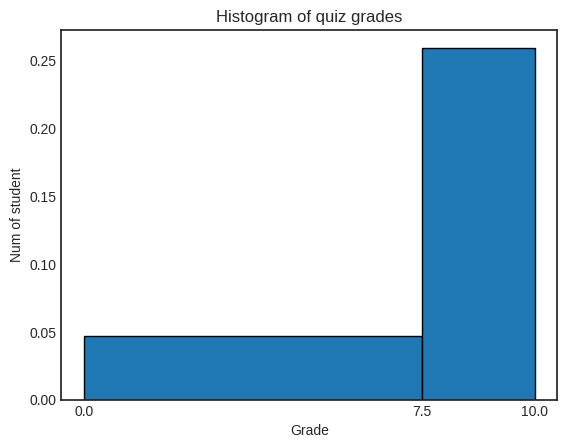

In [36]:
# Đây mới là histogram!
# Diện tích của cột ứng với số lượng sinh viên đã được chuẩn hóa 
# về tỉ lệ tương đối (tổng diện tích của các cột sẽ bằng 1) 
# Chia ra 4 bin có độ rộng bằng nhau
# bằng cách truyền một con số vào tham số bin của plt.hist
# cols['Grade/10.00']
hist = plt.hist(cols['Grade/10.00'], [0, 7.5, 10], edgecolor='black', density=True)
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.xticks(hist[1])
plt.show()

In [37]:
hist[0]

array([0.04691358, 0.25925926])

In [38]:
hist[0][0]*7.5 + hist[0][1]*2.5

1.0

### Tiếp tục với histogram gồm 2 bin [0, 7.5) và [7.5, 10]: phân bố của các giá trị trong bin [7.5, 10]?

Histogram giả định các giá trị được phân bố đều trong mỗi bin. Điều này được thể hiện bởi đường nằm ngang ở trên đầu cột của mỗi bin.

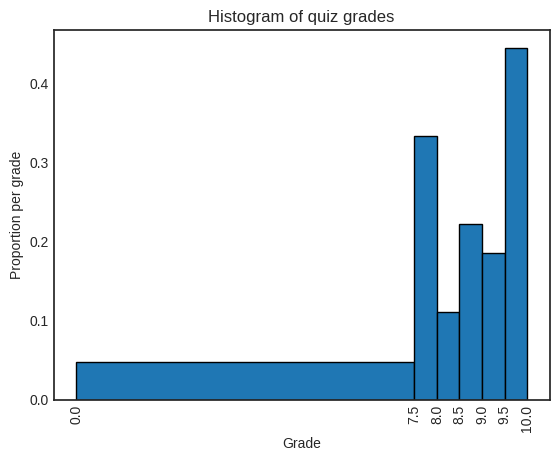

In [39]:
# Thử chi tiết hóa ra bin [12, 16]
# Thử chi tiết hóa ra bin [12, 16]
hist = plt.hist(cols['Grade/10.00'], 
                [0, 7.5, 8, 8.5, 9, 9.5, 10], 
                edgecolor='black', density=True)
plt.xlabel('Grade')
plt.ylabel('Proportion per grade')
plt.title('Histogram of quiz grades')
plt.xticks(hist[1], rotation=90);

Tùy ngữ cảnh cụ thể mà bạn có thể muốn chi tiết hóa ra, có thể không muốn chi tiết hóa ra, nhưng khi nhìn hình của histogram thì bạn nên hiểu về giả định phân bố đều trong mỗi bin của histogram.

### Vẽ histogram của cột điểm "Grade/10.00" với 4 bin [0, 2), [2, 4), [4, 6),  [6, 8), [8, 10] + 3 đường đứng ứng với lower quartile, median, upper quartile

In [40]:
def compute_percentile(data, p):
    sorted_grades = sorted(data)
    i = int(p/100 * (len(sorted_grades)-1))
    return sorted_grades[i]
lower_quartile = compute_percentile(cols['Grade/10.00'], 25)
median = compute_percentile(cols['Grade/10.00'], 50)
upper_quartile = compute_percentile(cols['Grade/10.00'], 75)
lower_quartile, median, upper_quartile

(6.56, 7.97, 9.38)

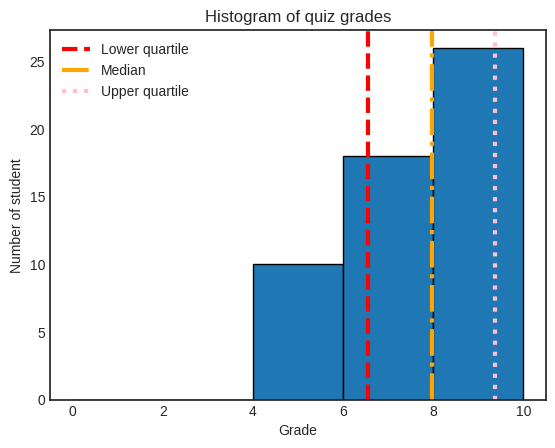

In [65]:
hist = plt.hist(cols['Grade/10.00'], 
                bins=[0, 2, 4, 6, 8, 10], 
                edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Number of student')
plt.title('Histogram of quiz grades')
plt.xticks(hist[1]);
plt.axvline(lower_quartile, linestyle='--', color='red', linewidth=3, label='Lower quartile')
plt.axvline(median, linestyle='-.', color='orange', linewidth=3, label='Median')
plt.axvline(upper_quartile, linestyle=':', color='pink', linewidth=3, label='Upper quartile')
plt.legend()
plt.show()

Tại sao diện tích của cột từ upper quartile đến max lại không tương đương với từ median đến upper quartile?

Do giả định phân bố đều của histogram trong bin [5, 10] là không chính xác. Thật ra là có nhiều giá trị tập trung vào vùng từ upper quartile đến max hơn là từ median đến upper quartile.

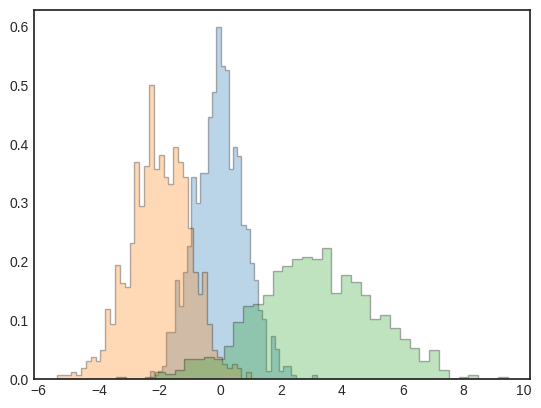

In [66]:
# So sánh histogram của các distribution
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

args = dict(histtype='stepfilled',bins=40,edgecolor='black', density=True, alpha = 0.3)
plt.hist(x1, **args)
plt.hist(x2, **args)
plt.hist(x3, **args)

plt.show()

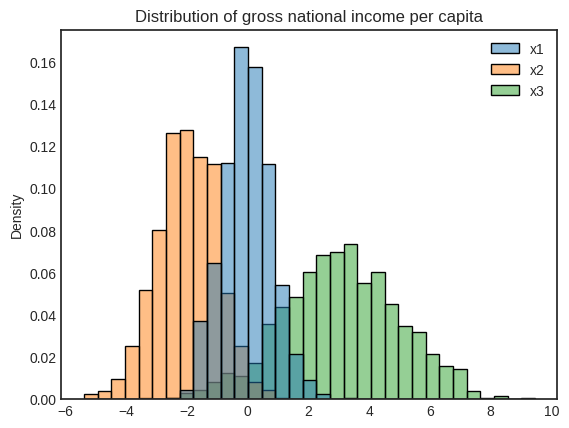

In [68]:
data = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
sns.histplot(data, stat="density")
plt.title("Distribution of gross national income per capita");

In [69]:
## Two-Dimensional Histograms and Binnings
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x,y = np.random.multivariate_normal(mean, cov, 10000).T
x, y

(array([-0.82153063, -1.83821693, -0.2420769 , ..., -1.1537837 ,
         1.25306299,  0.32704934]),
 array([-0.93410977, -1.67584158,  0.36025223, ..., -2.06562994,
         2.33117627,  2.31528106]))

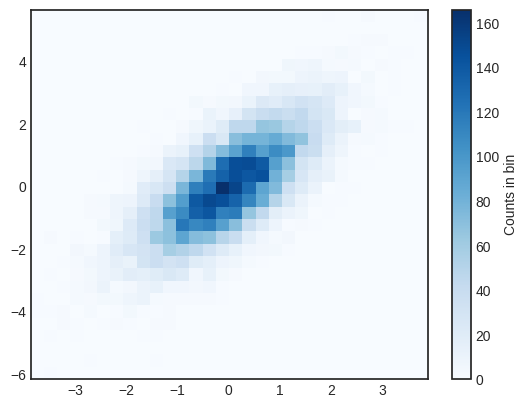

In [73]:
# Dùng plt.hist2d để vẽ 2D histogram
his2d = plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in bin')
plt.show()

## Bar plot

Dùng để trực quan hóa phân bố các giá trị của biến dạng "categorical"
- Numerical
- **Categorical**

### Đọc dữ liệu đăng ký chuyên ngành K2021 (CQ) từ file và lấy ra cột các chuyên ngành

In [83]:
file = open('Data/CQ2021Majors.txt', 'r')
majors = []
for line in file:
    if line[0].isdigit():
        line = line.split('Không đăng ký nguyện vọng chuyên ngành')[0]
        line = line.rstrip()
        major = ''
        for i in range(len(line) - 1, -1, -1):
            major = line[i] + major
            if line[i].isupper() and line[i - 2] != '+':
                break
            
        majors.append(major)

file.close()
print(majors)

['Công nghệ thông tin', 'Thị giác máy tính', 'Khoa học máy tính + Khoa học dữ liệu', 'Mạng máy tính và viễn thông', 'Hệ thống thông tin', 'Thị giác máy tính', 'Thị giác máy tính', 'Công nghệ tri thức + An toàn thông tin', 'Không đạt điều kiện xét', 'Khoa học máy tính + Khoa học dữ liệu', 'Kỹ thuật phần mềm', 'Hệ thống thông tin', 'Kỹ thuật phần mềm', 'Kỹ thuật phần mềm', 'Khoa học máy tính + Khoa học dữ liệu', 'Khoa học máy tính + Khoa học dữ liệu', 'Kỹ thuật phần mềm', 'Công nghệ thông tin', 'Khoa học máy tính + Khoa học dữ liệu', 'Hệ thống thông tin', 'Công nghệ thông tin', 'Công nghệ thông tin', 'Công nghệ tri thức + An toàn thông tin', 'Công nghệ thông tin', 'Khoa học máy tính + Khoa học dữ liệu', 'Công nghệ thông tin', 'Kỹ thuật phần mềm', 'Khoa học máy tính + Khoa học dữ liệu', 'Kỹ thuật phần mềm', 'Hệ thống thông tin', 'Khoa học máy tính + Khoa học dữ liệu', 'Công nghệ thông tin', 'Công nghệ thông tin', 'Không đạt điều kiện xét', 'Công nghệ thông tin', 'Khoa học máy tính + Kh

In [81]:
len(majors)

328

### Vẽ bar plot của cột các chuyên ngành

Bước 1: đếm số lần xuất hiện của mỗi chuyên ngành

In [84]:
majors_dist_df = pd.DataFrame({'Major':majors})
majors_dist = majors_dist_df['Major'].value_counts()
majors_dist

Kỹ thuật phần mềm                          100
Khoa học máy tính + Khoa học dữ liệu        70
Hệ thống thông tin                          60
Công nghệ thông tin                         36
Công nghệ tri thức + An toàn thông tin     28
Thị giác máy tính                           16
Mạng máy tính và viễn thông                11
Không đạt điều kiện xét                      7
Name: Major, dtype: int64

In [86]:
majors = majors_dist.index
counts = majors_dist.values

Bước 2: vẽ bar plot từ kết quả của bước 1

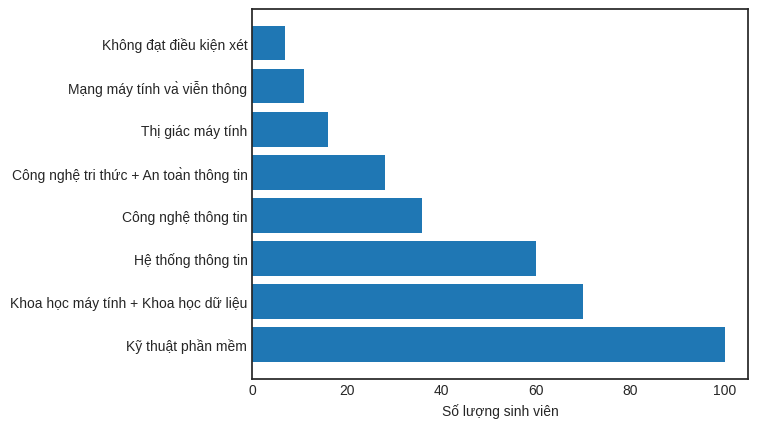

In [93]:
plt.barh(majors, counts);
plt.xlabel("Số lượng sinh viên")

plt.show()

In [96]:
# Trong bar plot, ta thường sẽ chuẩn hóa các giá trị đếm 
# về tỉ lệ tương đối
ratios = counts/counts.sum()
ratios

array([0.30487805, 0.21341463, 0.18292683, 0.1097561 , 0.08536585,
       0.04878049, 0.03353659, 0.02134146])

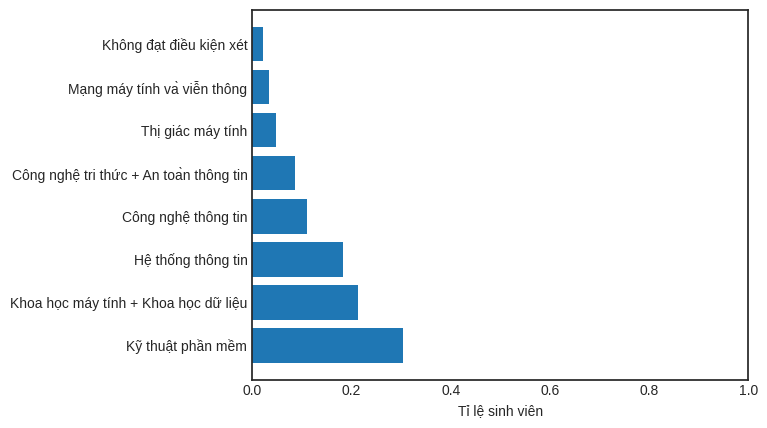

In [98]:
plt.barh(majors, ratios)
plt.xlabel('Tỉ lệ sinh viên')
plt.xlim(0, 1)
plt.show()

`pandas` native plotting:

<Axes: xlabel='Major'>

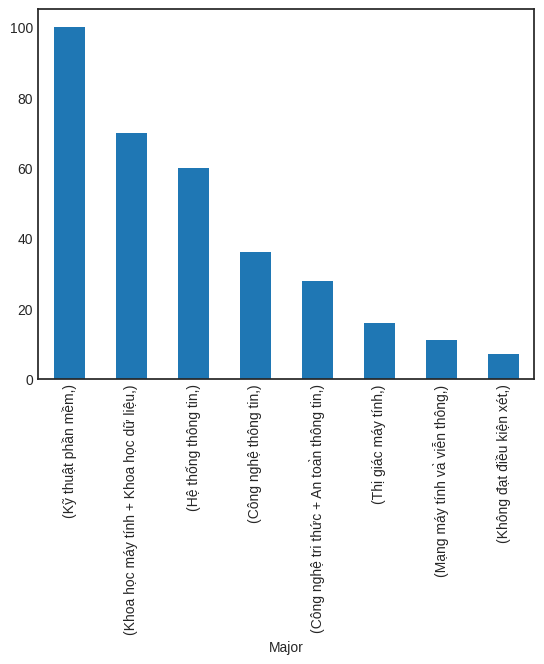

In [105]:
majors_dist_df.value_counts().plot(kind='bar')

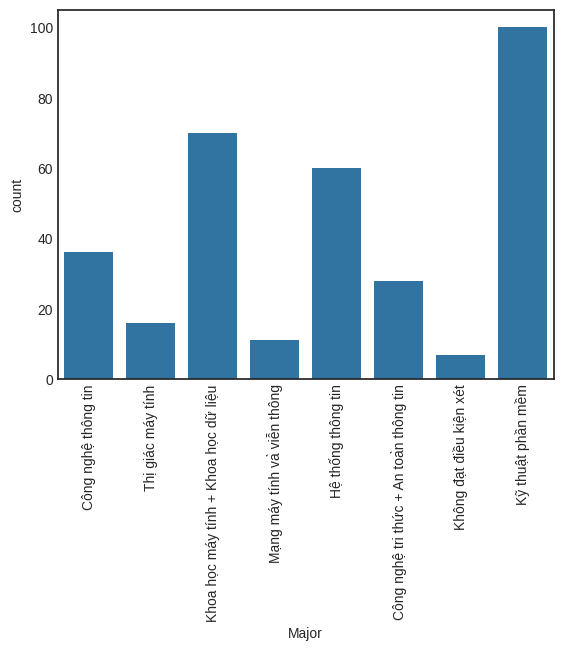

In [107]:
sns.countplot(data=majors_dist_df, x='Major',orient='h');
plt.xticks(rotation=90);

Bar plot vs histogram?

Bar plot | Histogram
:--- | :---
Trục hoành (hay trục tung đối với bar plot nằm ngang) là biến "categorical" | Trục hoành là biến "numerical"
Với biến "categorical" không có tính thứ tự (ví dụ, chuyên ngành) thì các bar không có thứ tự với nhau và ta có thể sắp xếp lại thứ tự của các bar cho dễ nhìn bằng cách sort các bar theo chiều cao; với biến "categorical" có tính thứ tự (ví dụ, mức độ hài lòng với các giá trị: rất hài lòng, hài lòng, không hài lòng, ...) thì các bar có thứ tự với nhau | Các bar có thứ tự với nhau
Các bar có độ rộng bằng nhau, giữa các bar có thể có các khoảng không và các khoảng không này bằng nhau | Các bar có thể có độ rộng không bằng nhau, các bar nằm nối tiếp nhau tạo thành một đoạn liên tục trên trục hoành
Tỉ lệ các phần tử tương ứng với chiều cao của bar | Tỉ lệ các phần tử tương ứng với diện tích của bar

## Ôn lại các câu lệnh đã học

Câu lệnh | Ý nghĩa
:--- | :---
`plt.hist` | Vẽ histogram của biến dạng "numeric"
`plt.bar`, `plt.barh` | Vẽ bar chart của biến dạng "categorical" (cần phải tính số lần hoặc tỉ lệ của các giá trị trước khi vẽ)
`plt.title` | Thêm tựa đề cho hình vẽ
`plt.xlabel` & `plt.ylabel` | Thêm nhãn cho trục x & y
`plt.xlim` & `plt.ylim` | Giới hạn miền giá trị cho trục x & y
`plt.xticks` & `plt.yticks` | Chỉ định các tick cho trục x & y
`plt.axvline` & `plt.axhline` | Vẽ đường thẳng nằm đứng & nằm ngang
`plt.legend` | Thêm chú thích cho ký hiệu, màu, ... trên hình vẽ
`plt.savefig` | Lưu hình vẽ xuống file

## Một số cách plot phổ biến khác

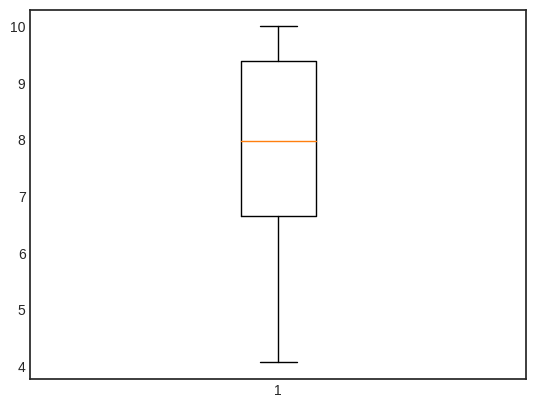

In [108]:
# Creating dataset
data = cols['Grade/10.00']
  
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

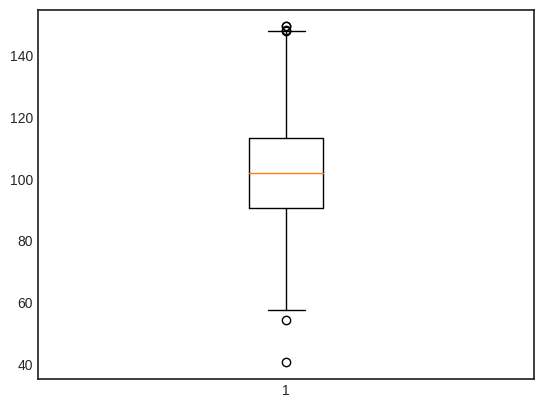

In [111]:
np.random.seed(10)
data = np.random.normal(100, 20, 200)
plt.boxplot(data)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f16f29be200>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f16f3ab0df0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f16f332c4c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f16f33aa800>}

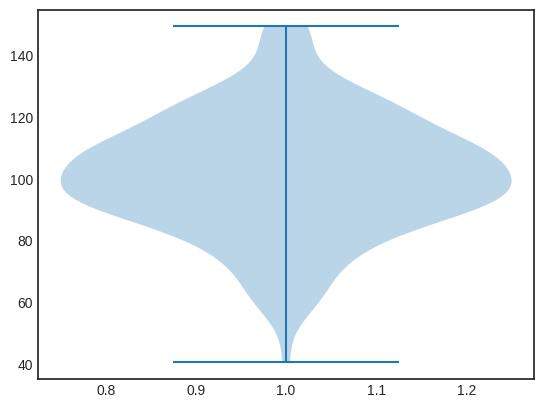

In [112]:
plt.violinplot(data)

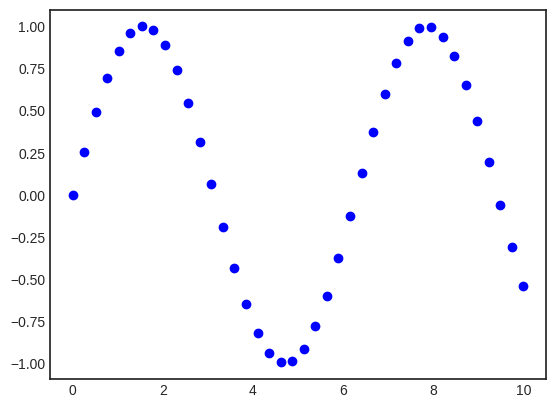

In [113]:
# Scatter Plots dùng để trực quan hóa mối quan hệ giữa hai biến liên tục
x = np.linspace(0, 10, 40)
y = np.sin(x)

plt.scatter(x, y, color='blue');

**Dùng scatter plot**

In [21]:
# Format của từng point (size, face color, edge color) có thể được xử lý riêng lẻ


- `plot` sẽ nhanh hơn scatter (trên dữ liệu lớn)
- `scatter` sẽ hiển thị được các điểm khác nhau.

## Nói thêm về matplotlib  

### Ba cách dùng matplotlib

<font color=blue>Cách 1: Dùng các câu lệnh của `plt`</font> (trước giờ là làm theo cách này)

Text(0.5, 1.0, 'Hello world')

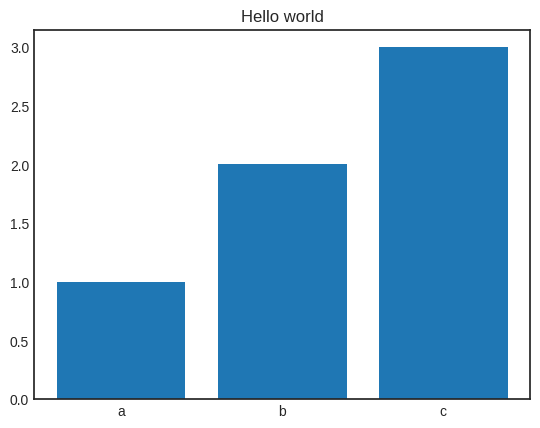

In [115]:
values = ['a', 'b', 'c']
counts = [1, 2, 3]

plt.bar(values, counts)
plt.title("Hello world")

<font color=blue>Cách 2: Dùng trực tiếp các phương thức của đối tượng figure ở bên dưới</font>

<font color=blue>Cách 3: Trộn lẫn giữa cách 1 và cách 2</font>

### Thay đổi style cho các hình vẽ 

Xem thêm về các style ở [document](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

# Vẽ nhiều subplot

In [23]:
plt.style.use('seaborn-v0_8-white')

**Tự tạo ra các trục tọa độ (axis)**

**Dùng subplot (lưu ý không `s`)**

In [24]:
# Thay đổi khoảng cách giữa các subplot


### ``plt.subplots``: Vẽ toàn bộ gird
**Lưu ý có `s`**

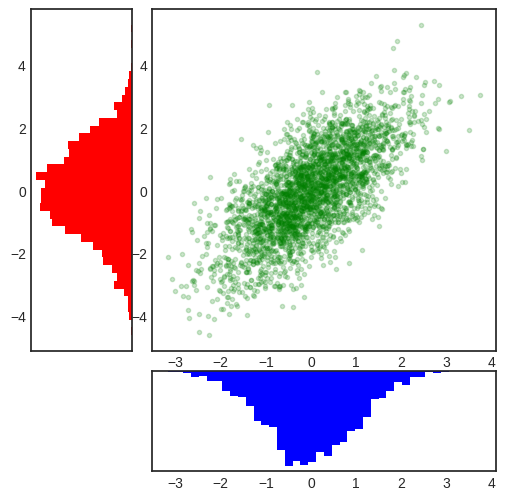

In [25]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'go', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='blue')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()